In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('/Users/lokeshreddychavva/Downloads/heart.csv')


In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
#Check for null values
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#unique values in target variable
dataset['target'].unique()

array([1, 0])

In [9]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

165 patients have heart disease and 138 don't have heart disease.

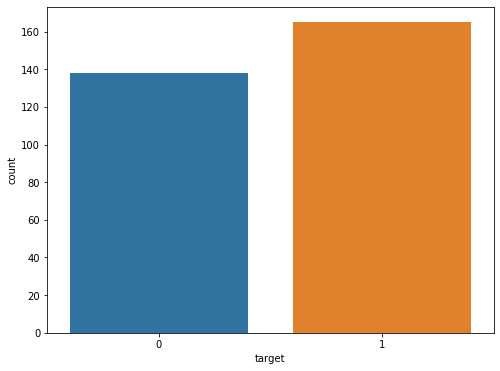

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=dataset)
plt.show()

In [11]:
#Heart disease according to sex
dataset.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

1 - male, 0 - female. So 72 females and 93 males have heart diseases and 24 females and 114 males don't have it.

In [12]:
correlation = dataset.corr()

In [13]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64

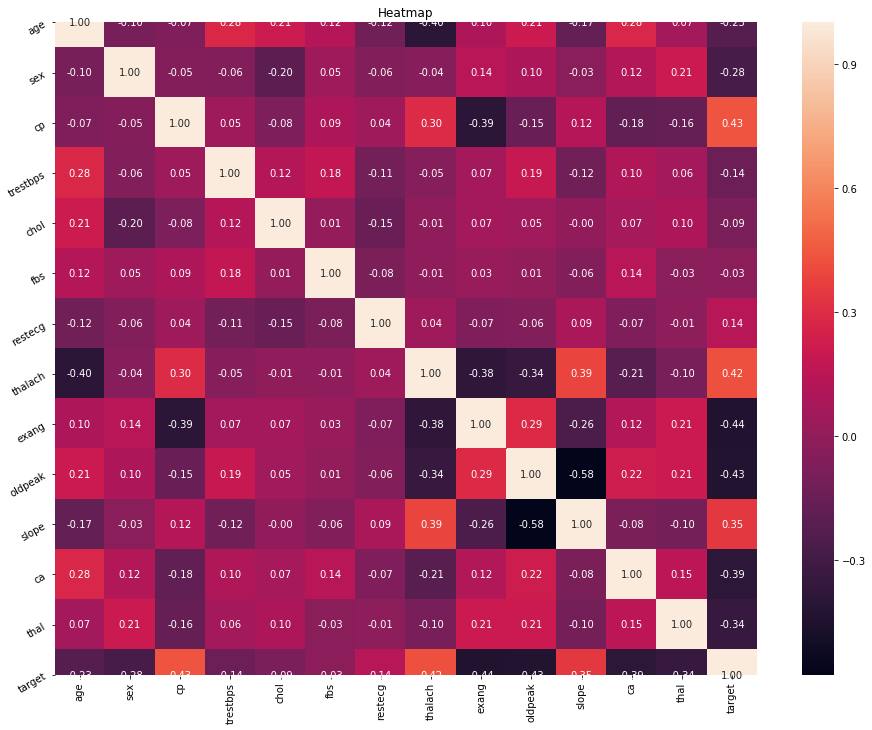

In [14]:
plt.figure(figsize=(16,12))
plt.title('Heatmap')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

cp,thalach,slope are highly positively correlated to target and exang,oldpeak,ca,thal are highly negatively correlated to target variable.

Text(0.5, 1.0, 'Chest Pain vs Heart Disease')

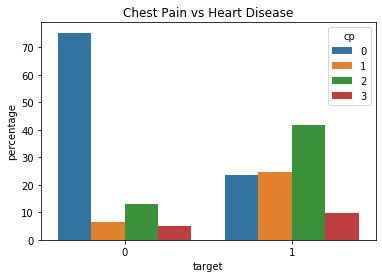

In [15]:
cp_heart = (dataset.groupby(['target']))['cp'].value_counts(normalize=True)\
.mul(100).reset_index(name = "percentage")
sns.barplot(x = "target", y = "percentage", hue = "cp", data = cp_heart)\
.set_title("Chest Pain vs Heart Disease")

Chest pain type 2 highly contributes for the presence of heart disease followed by 1,0 and 3.

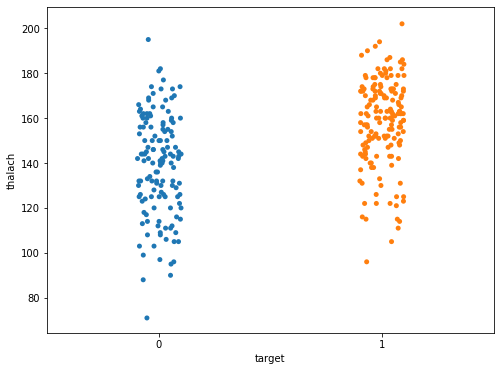

In [16]:
# thalach vs heart disease
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=dataset)
plt.show()

We can see that those people suffering from heart disease have relatively higher heart rate (thalach) as compared to people who are not suffering from heart disease.

In [17]:
dataset['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Mean value of age of patients in our dataset is 54 which ranges from minimum 29 to maximum 77.

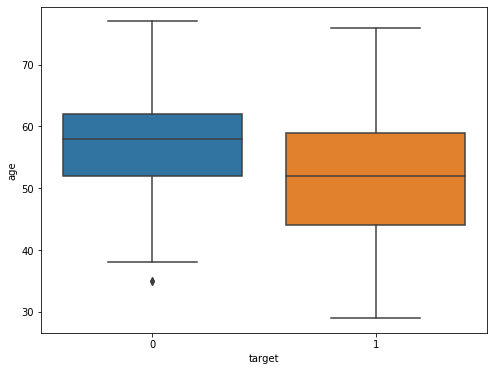

In [18]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=dataset)
plt.show()

The mean age of the people who have heart disease is less than the mean age of the people who do not have heart disease.

In [19]:
# Avg age of male who got heart disease
dataset[(dataset.target ==  1) & (dataset.sex == 1)].age.mean()

50.903225806451616

In [20]:
# Avg age of female who got heart disease
dataset[(dataset.target ==  1) & (dataset.sex == 0)].age.mean()

54.55555555555556

# Classification models

## Random Forest Classification

In [21]:
X1= dataset.drop('target',axis=1)
y1=dataset['target']

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
clf_rf = RandomForestClassifier(random_state=42)      
clr_rf = clf_rf.fit(x_train,y_train)

In [23]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [24]:
mae_rf = mae(y_test,clf_rf.predict(x_test))
print('Mean Absolute Error of Random Forest Classifier is: ',mae_rf)
mse_rf = mse(y_test,clf_rf.predict(x_test))
print('Mean Squared Error of Random Forest Classifier is: ',mse_rf)
rmse_rf = np.sqrt(mse(y_test,clf_rf.predict(x_test)))
print('Root Mean Squared Error of Random Forest Classifier is: ',rmse_rf)
cm_rf = confusion_matrix(y_test,clf_rf.predict(x_test))
cm_rf

Mean Absolute Error of Random Forest Classifier is:  0.14754098360655737
Mean Squared Error of Random Forest Classifier is:  0.14754098360655737
Root Mean Squared Error of Random Forest Classifier is:  0.3841106397986879


array([[26,  3],
       [ 6, 26]])

## Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver='lbfgs', random_state=42)      
clf_lr = clf_lr.fit(x_train,y_train)
mae_lr = mae(y_test,clf_lr.predict(x_test))
print('Mean Absolute Error of Logistic Regression Classifier is: ',mae_lr)
mse_lr = mse(y_test,clf_lr.predict(x_test))
print('Mean Squared Error of Logistic Regression Classifier is: ',mse_lr)
rmse_lr = np.sqrt(mse(y_test,clf_lr.predict(x_test)))
print('Root Mean Squared Error of Logistic Regression Classifier is: ',rmse_lr)
cm_lr = confusion_matrix(y_test,clf_lr.predict(x_test))
cm_lr

Mean Absolute Error of Logistic Regression Classifier is:  0.11475409836065574
Mean Squared Error of Logistic Regression Classifier is:  0.11475409836065574
Root Mean Squared Error of Logistic Regression Classifier is:  0.3387537429470791


array([[25,  4],
       [ 3, 29]])

## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)      
clf_dt = clf_dt.fit(x_train,y_train)
mae_dt = mae(y_test,clf_dt.predict(x_test))
print('Mean Absolute Error of Decision Tree Classifier is: ',mae_dt)
mse_dt = mse(y_test,clf_dt.predict(x_test))
print('Mean Squared Error of Decision Tree Classifier is: ',mse_dt)
rmse_dt = np.sqrt(mse(y_test,clf_dt.predict(x_test)))
print('Root Mean Squared Error of Decision Tree Classifier is: ',rmse_dt)
cm_dt = confusion_matrix(y_test,clf_dt.predict(x_test))
cm_dt

Mean Absolute Error of Decision Tree Classifier is:  0.2459016393442623
Mean Squared Error of Decision Tree Classifier is:  0.2459016393442623
Root Mean Squared Error of Decision Tree Classifier is:  0.4958847036804647


array([[25,  4],
       [11, 21]])

## Adaboost

In [27]:
from sklearn.ensemble import AdaBoostClassifier
clf_ab = AdaBoostClassifier(random_state=42)      
clf_ab = clf_ab.fit(x_train,y_train)
mae_ab = mae(y_test,clf_ab.predict(x_test))
print('Mean Absolute Error of Adaboost Classifier is: ',mae_ab)
mse_ab = mse(y_test,clf_ab.predict(x_test))
print('Mean Squared Error of Adaboost Classifier is: ',mse_ab)
rmse_ab = np.sqrt(mse(y_test,clf_ab.predict(x_test)))
print('Root Mean Squared Error of Adaboost Classifier is: ',rmse_ab)
cm_ab = confusion_matrix(y_test,clf_ab.predict(x_test))
cm_ab

Mean Absolute Error of Adaboost Classifier is:  0.19672131147540983
Mean Squared Error of Adaboost Classifier is:  0.19672131147540983
Root Mean Squared Error of Adaboost Classifier is:  0.4435327625727437


array([[25,  4],
       [ 8, 24]])

## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier()      
clf_knn = clf_knn.fit(x_train,y_train)
mae_knn = mae(y_test,clf_knn.predict(x_test))
print('Mean knnsolute Error of knn Classifier is: ',mae_knn)
mse_knn = mse(y_test,clf_knn.predict(x_test))
print('Mean Squared Error of knn Classifier is: ',mse_knn)
rmse_knn = np.sqrt(mse(y_test,clf_knn.predict(x_test)))
print('Root Mean Squared Error of knn Classifier is: ',rmse_knn)
cm_knn = confusion_matrix(y_test,clf_knn.predict(x_test))
cm_knn

Mean knnsolute Error of knn Classifier is:  0.3114754098360656
Mean Squared Error of knn Classifier is:  0.3114754098360656
Root Mean Squared Error of knn Classifier is:  0.5580998206737443


array([[18, 11],
       [ 8, 24]])

## Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
clf_nb = GaussianNB()      
clf_nb = clf_nb.fit(x_train,y_train)
mae_nb = mae(y_test,clf_nb.predict(x_test))
print('Mean nbsolute Error of Naive Bayes Classifier is: ',mae_nb)
mse_nb = mse(y_test,clf_nb.predict(x_test))
print('Mean Squared Error of Naive Bayes Classifier is: ',mse_nb)
rmse_nb = np.sqrt(mse(y_test,clf_nb.predict(x_test)))
print('Root Mean Squared Error of Naive Bayes Classifier is: ',rmse_nb)
cm_nb = confusion_matrix(y_test,clf_nb.predict(x_test))
cm_nb

Mean nbsolute Error of Naive Bayes Classifier is:  0.13114754098360656
Mean Squared Error of Naive Bayes Classifier is:  0.13114754098360656
Root Mean Squared Error of Naive Bayes Classifier is:  0.3621429841700741


array([[26,  3],
       [ 5, 27]])

In [30]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV

In [31]:
logistic = LogisticRegression()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(logistic, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
logistic_fit_time = scores['fit_time'].mean()
logistic_score_time = scores['score_time'].mean()
logistic_accuracy = scores['test_accuracy'].mean()
logistic_precision = scores['test_precision_macro'].mean()
logistic_recall = scores['test_recall_macro'].mean()
logistic_f1 = scores['test_f1_weighted'].mean()
logistic_roc = scores['test_roc_auc'].mean()

In [32]:
decision_tree = DecisionTreeClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(decision_tree, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
dec_tree_fit_time = scores['fit_time'].mean()
dec_tree_score_time = scores['score_time'].mean()
dec_tree_accuracy = scores['test_accuracy'].mean()
dec_tree_precision = scores['test_precision_macro'].mean()
dec_tree_recall = scores['test_recall_macro'].mean()
dec_tree_f1 = scores['test_f1_weighted'].mean()
dec_tree_roc = scores['test_roc_auc'].mean()

In [33]:
random_forest = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(random_forest, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
randforestfit_time = scores['fit_time'].mean()
randforestscore_time = scores['score_time'].mean()
randforestaccuracy = scores['test_accuracy'].mean()
randforestprecision = scores['test_precision_macro'].mean()
randforestrecall = scores['test_recall_macro'].mean()
randforestf1 = scores['test_f1_weighted'].mean()
randforestroc = scores['test_roc_auc'].mean()

In [34]:
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(KNN, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
KNN_fit_time = scores['fit_time'].mean()
KNN_score_time = scores['score_time'].mean()
KNN_accuracy = scores['test_accuracy'].mean()
KNN_precision = scores['test_precision_macro'].mean()
KNN_recall = scores['test_recall_macro'].mean()
KNN_f1 = scores['test_f1_weighted'].mean()
KNN_roc = scores['test_roc_auc'].mean()

In [35]:
bayes = GaussianNB()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(bayes, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
bayes_fit_time = scores['fit_time'].mean()
bayes_score_time = scores['score_time'].mean()
bayes_accuracy = scores['test_accuracy'].mean()
bayes_precision = scores['test_precision_macro'].mean()
bayes_recall = scores['test_recall_macro'].mean()
bayes_f1 = scores['test_f1_weighted'].mean()
bayes_roc = scores['test_roc_auc'].mean()

In [36]:
ada = AdaBoostClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores = cross_validate(ada, x_train, y_train, scoring=scoring, cv=20)

sorted(scores.keys())
ada_fit_time = scores['fit_time'].mean()
ada_score_time = scores['score_time'].mean()
ada_accuracy = scores['test_accuracy'].mean()
ada_precision = scores['test_precision_macro'].mean()
ada_recall = scores['test_recall_macro'].mean()
ada_f1 = scores['test_f1_weighted'].mean()
ada_roc = scores['test_roc_auc'].mean()

In [37]:
models = pd.DataFrame({
    'Model'       : ['Logistic Regression', 'Decision Tree', 'Random Forest', 'K-Nearest Neighbors', 'Bayes', 'AdaBoost'],
    'Fitting time': [logistic_fit_time, dec_tree_fit_time, randforestfit_time, KNN_fit_time, bayes_fit_time, ada_fit_time],
    'Scoring time': [logistic_score_time, dec_tree_score_time, randforestscore_time, KNN_score_time, bayes_score_time, ada_score_time],
    'Accuracy'    : [logistic_accuracy, dec_tree_accuracy, randforestaccuracy, KNN_accuracy, bayes_accuracy, ada_accuracy],
    'Precision'   : [logistic_precision, dec_tree_precision, randforestprecision, KNN_precision, bayes_precision, ada_precision],
    'Recall'      : [logistic_recall, dec_tree_recall, randforestrecall, KNN_recall, bayes_recall, ada_recall],
    'F1_score'    : [logistic_f1, dec_tree_f1, randforestf1, KNN_f1, bayes_f1, ada_f1],
    'AUC_ROC'     : [logistic_roc, dec_tree_roc, randforestroc, KNN_roc, bayes_roc, ada_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'AUC_ROC'])

models.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC
0,Logistic Regression,0.002342,0.005689,0.809819,0.825625,0.802381,0.804789,0.888095
4,Bayes,0.002126,0.006761,0.790559,0.799623,0.785238,0.786701,0.876429
5,AdaBoost,0.056957,0.034168,0.788549,0.811815,0.786190,0.783942,0.855000
2,Random Forest,0.018627,0.014990,0.752972,0.766637,0.753690,0.749465,0.856905
1,Decision Tree,0.003052,0.009627,0.729866,0.735992,0.727500,0.727438,0.727500
3,K-Nearest Neighbors,0.002010,0.011603,0.611189,0.610284,0.599167,0.597988,0.653095


In [38]:
mae = [mae_lr,mae_dt,mae_rf,mae_knn,mae_nb,mae_ab]
mse = [mse_lr,mse_dt,mse_rf,mse_knn,mse_nb,mse_ab]
rmse = [rmse_lr,rmse_dt,rmse_rf,rmse_knn,rmse_nb,rmse_ab]

In [39]:
models['Mean Absolute Error'] = mae
models['Mean Squared Error'] = mse
models['Root Mean Squared Error'] = rmse

In [40]:
models.sort_values(by='Accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,AUC_ROC,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Logistic Regression,0.002342,0.005689,0.809819,0.825625,0.802381,0.804789,0.888095,0.114754,0.114754,0.338754
4,Bayes,0.002126,0.006761,0.790559,0.799623,0.785238,0.786701,0.876429,0.131148,0.131148,0.362143
5,AdaBoost,0.056957,0.034168,0.788549,0.811815,0.786190,0.783942,0.855000,0.196721,0.196721,0.443533
2,Random Forest,0.018627,0.014990,0.752972,0.766637,0.753690,0.749465,0.856905,0.147541,0.147541,0.384111
1,Decision Tree,0.003052,0.009627,0.729866,0.735992,0.727500,0.727438,0.727500,0.245902,0.245902,0.495885
3,K-Nearest Neighbors,0.002010,0.011603,0.611189,0.610284,0.599167,0.597988,0.653095,0.311475,0.311475,0.558100
